<a href="https://colab.research.google.com/github/johnny314159/ECSE415_Fall2021/blob/main/Assignment%201/ECSE415_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#path variable
path = '/content/drive/My Drive/Assignment 1/' #see README.md

#Notebook by Johnny Liu, ID 260800456

#Import libraries, access image path
from google.colab import drive

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import copy

%matplotlib inline

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Question 1: Thresholding**
**Pt. 1: Threshold the image at three different thresholds a) 80 b) 140 and c) 200 using simple binary thresholding as defined above. Display the thresholded images at these thresholds**

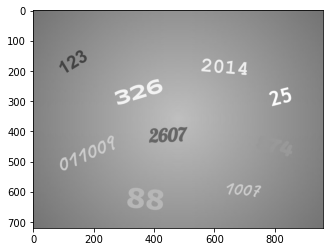

In [ ]:
#read in and display Q1 image
img = mpimg.imread(path+'numbers.jpg')
plt.imshow(img, cmap = 'gray')

In [ ]:
#convert from RGB to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

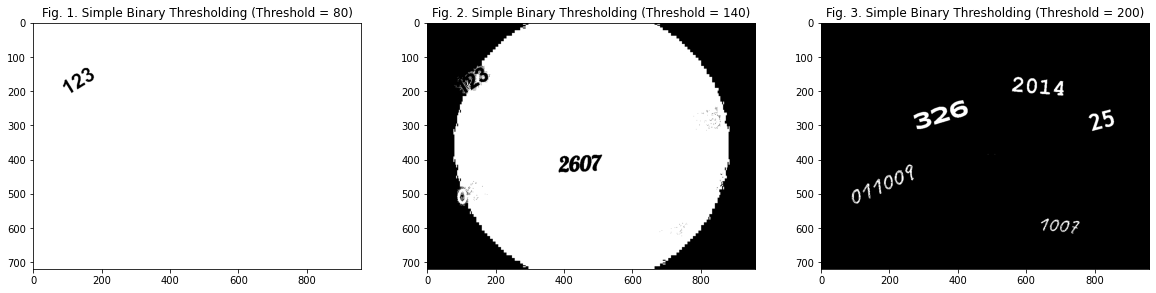

In [ ]:
#implement binary threshold
binary_thresholds = [80, 140, 200]
def binary_thresholding(pixel, threshold):
  if pixel > threshold:
    return 255
  else:
    return 0

#vectorize function to run on np 2darray (gray_img)
vector_bt = np.vectorize(binary_thresholding)

#init. dictionary to hold thresholded values for q1.1
result_q1_1 = {binary_thresholds[0]: [], binary_thresholds[1]: [], binary_thresholds[2]: []}

#create objects for plot
fig, axs = plt.subplots(ncols = 3, sharex=True, figsize=(20,10))

n = 0 #counter for iterating through 3 thresholds

#loop to plot 3 different thresholds
for t in binary_thresholds:
  result_q1_1[t] = vector_bt(gray_img, t)
  axs[n].imshow(result_q1_1[t], cmap = 'gray')
  str = ('Fig. {}. Simple Binary Thresholding (Threshold = {})').format(n + 1, t)
  axs[n].set_title(str)
  n += 1
  

**Q1, Pt. 2: Write your observations about thresholded images at different thresholds. How many and which numbers are segmented at each threshold? What else do you observe at each threshold?**

*   At a threshold of 80, only one number, 123, is segmented. The vast majority of pixels are brighter than a value of 80 and therefore most of the information is lost as "foreground".
*   At a threshold of 140, only one number, 2607, is segmented. A white illumination circle is visible in the centre, roughly separating the foreground and background regions. The outer parts of the image had values between 80 and 140, since they were white in Fig 1. Parts of the numbers 123, 25 and 011009 are visible but not segmented.
*   At a threshold of 200, 5 numbers: 011009, 326, 2014, 1007 and 25, are segmented and clearly in the foreground. The black background covers the rest of the image. Two numbers which were segmented at lower thresholds, 123 and 2607, have been lost into the background, since they were originally segmented as being black.
* The number 88, which is visible in the original image, is not segmented in Figs. 1-3 because it has an intensity between 140 and 200, and ends up being indistinguishable from the foreground in Fig. 2 and background in Fig. 3.


**Q1, Pt. 3: Threshold the image using Window binary thresholding using three different ranges of thresholds. a) T1=60 and T2=110, b) T1=60 and T2=150, c) T1=90 and T2=150. Write your observations. Display images at these different thresholds. How many and which numbers are segmented at each threshold?**


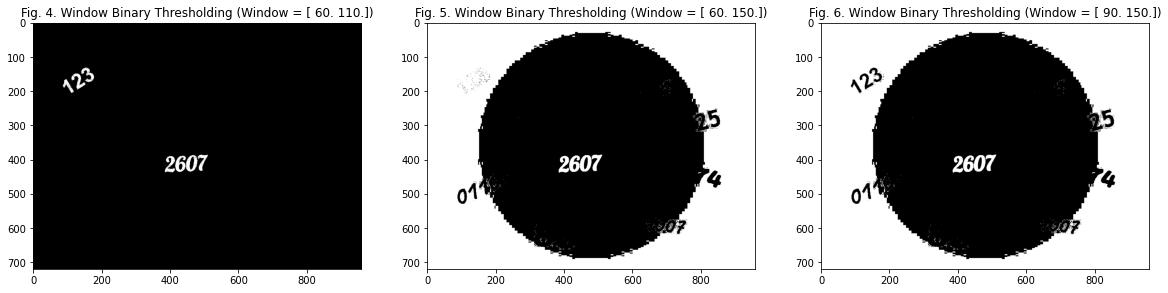

In [ ]:
#set up threshold windows:
window = np.ndarray([3, 2])
window[0] = [60, 110]
window[1] = [60, 150]
window[2] = [90, 150]

def window_thresholding(pixel, lower_bound, upper_bound):
  if pixel > lower_bound and pixel < upper_bound:
    return 255
  else:
    return 0

vector_wt = np.vectorize(window_thresholding)

#init. dictionary to hold thresholded values for q1.2
result_q1_2 = {0: [], 1: [], 2: []}

#create objects for plot
fig, axs = plt.subplots(ncols = 3, sharex=True, figsize=(20,10))

n = 0 #counter for iterating through 3 thresholds

#loop to plot 3 different thresholds
for t in range(0, len(window)):
  result_q1_2[t] = vector_wt(gray_img, window[t][0], window[t][1])
  axs[n].imshow(result_q1_2[t], cmap = 'gray')
  str = ('Fig. {}. Window Binary Thresholding (Window = {})').format(n + 4, window[t])
  axs[n].set_title(str)
  n += 1

Q1, Pt. 3 Observations:

*   In Fig. 4, no illumination circle is present and the segmented numbers are the only foreground. In Figs. 5 and 6, a background illumination circle is present in the centre. Around the edge of this circle, parts of some numbers are visible (e.g. 25, 011), but not well segmented.
*   Within the window [60 110], two numbers, 123 and 2607, are segmented in the foreground.
*   Within the window [60 150], one number, 2607, is segmented in the foreground.
*   Within the window [90 150], two numbers, 123 and 2607, are segmented, in the background and foreground respectively.

**Q1, Pt.4. Find a threshold value such that only the numbers ”123”, ”326”, ”2014”, and ”25” are segmented. Report your findings and display the corresponding thresholded images for at least three different threshold values, and write how it helped you in narrowing down the desired parameter value. Note that the emphasis is not to get the exact output but to explore different parameters and report your findings**

Process and Findings:


1.   The numbers which are to be segmented include the darkest one (123) and the 3 lightest (326, 2014, 25), so a window thresholding which converts pixels in between these two extremes to 255 might work.
2.   Figs 7 -> 9 represent the process I took. 
3.   I started with [60, 240]. 326 and 25 were well segmented, but 123 and 2014 had some white pixels left. 2014 is still better than 123, so the lower bound will be increased more than the upper bound's decrease.
4.   I then tried [80, 230]. The required numbers were well segmented, however I felt like 2014 had some white pixels speckled in (Fig. 8). 
5.   Consequently, I decreased the upper bound a bit to try and turn more of 2014's pixels black, and arrived at [80, 215]. 2014 looks marginally darker here (Fig. 9), but the undesired numbers are still within the window and remain white.



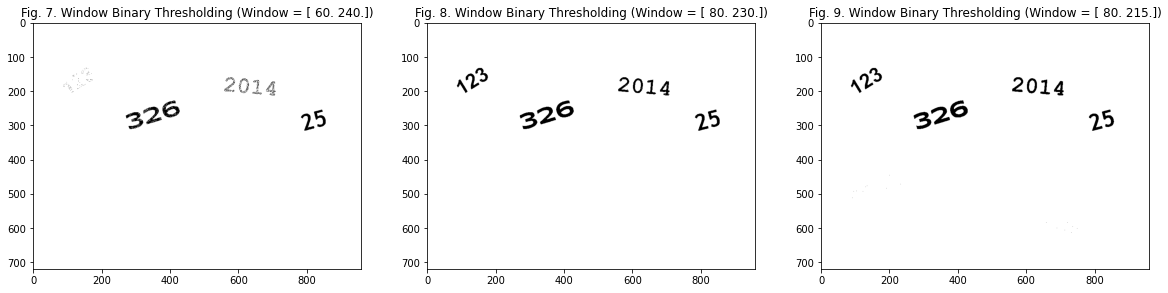

In [ ]:
#set up threshold windows; window_thresholding/vector_wt from pt 3 can be reused
window = np.ndarray([3, 2])
window[0] = [60, 240]
window[1] = [80, 230]
window[2] = [80, 215]

vector_wt = np.vectorize(window_thresholding)

#init. dictionary to hold thresholded values for q1.3
result_q1_3 = {0: [], 1: [], 2: []}

#create objects for plot
fig, axs = plt.subplots(ncols = 3, sharex=True, figsize=(20,10))

n = 0 #counter for iterating through 3 thresholds

#loop to plot 3 different thresholds
for t in range(0, len(window)):
  result_q1_2[t] = vector_wt(gray_img, window[t][0], window[t][1])
  axs[n].imshow(result_q1_2[t], cmap = 'gray')
  str = ('Fig. {}. Window Binary Thresholding (Window = {})').format(n + 7, window[t])
  axs[n].set_title(str)
  n += 1

# **Question 2: Denoising**

In [ ]:
#import all images
tower_2a = mpimg.imread(path + 'Tower.png')
tower_2b = mpimg.imread(path + 'Tower_Gauss_Noise.png')
tower_2c = mpimg.imread(path + 'Tower_Salt_and_Pepper_Noise.png')

#convert to grayscale
grey_2a = cv2.cvtColor(tower_2a, cv2.COLOR_BGR2GRAY)
grey_2b = cv2.cvtColor(tower_2b, cv2.COLOR_BGR2GRAY)
grey_2c = cv2.cvtColor(tower_2c, cv2.COLOR_BGR2GRAY)

In [ ]:
#generate Gaussian kernel
def gaussian_kernel(size, sigma):
  size = int(size) // 2
  x, y = np.mgrid[-size:size+1, -size:size+1]
  normal = 1 / (2.0 * np.pi * sigma**2)
  g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal 
  g = g/np.sum(g)
  return g, x, y

gaussian_kernel_3x3, x, y = gaussian_kernel(3, np.sqrt(2))
print(gaussian_kernel_3x3)

[[0.09272289 0.11905855 0.09272289]
 [0.11905855 0.15287421 0.11905855]
 [0.09272289 0.11905855 0.09272289]]


In [ ]:
#method for convolution using numpy
def convolution_2d(image, kernel):

  pad_size = np.floor(3/2).astype("uint8")
  pad_image = np.pad(image, pad_width = int(pad_size), mode = 'constant', constant_values=0)

  h, w = pad_image.shape
  #init. output
  output = np.zeros_like(image)

  #loop through, use broadcast for elementwise multiplication.
  for i in range(0, h-2*pad_size):
    for j in range(0, w - 2*pad_size):
      A = kernel * (pad_image[i: i + kernel.shape[0], j: j + kernel.shape[1]])
      output[i,j] = A.sum()
  return output



**Q2 Pt. 1: Filter the noisy image using a 3 × 3 Gaussian filter with variance equal to 2. Display the filtered image along with the original image**

In [ ]:
#apply convolution with gaussian kernel
tower_gauss_filtered = convolution_2d(grey_2b, gaussian_kernel_3x3)

Text(0.5, 1.0, 'Fig. 11. Tower with Gaussian Noise')

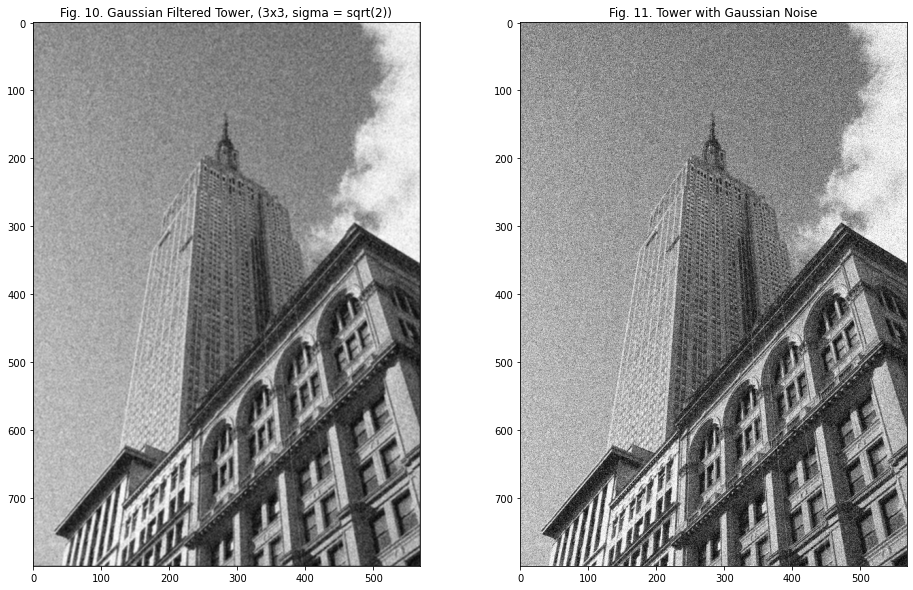

In [ ]:
#plot side by side
fig, axs = plt.subplots(ncols = 2, figsize=(16,10))
axs[0].imshow(tower_gauss_filtered, cmap = 'gray')
axs[0].set_title('Fig. 10. Gaussian Filtered Tower, (3x3, sigma = sqrt(2))')
axs[1].imshow(grey_2b, cmap = 'gray')
axs[1].set_title('Fig. 11. Tower with Gaussian Noise')


**Q2, Pt. 2: Filter the noisy image using a box filter of the same size. Display the filtered image along with original image.**

In [ ]:
#box kernel:
box_3x3 = np.array([[ 1, 1, 1], 
                   [ 1, 1, 1], 
                   [ 1, 1, 1]])/(9)

In [ ]:
tower_box_filtered = convolution_2d(grey_2b, box_3x3)

Text(0.5, 1.0, 'Fig. 11. Tower with Gaussian Noise')

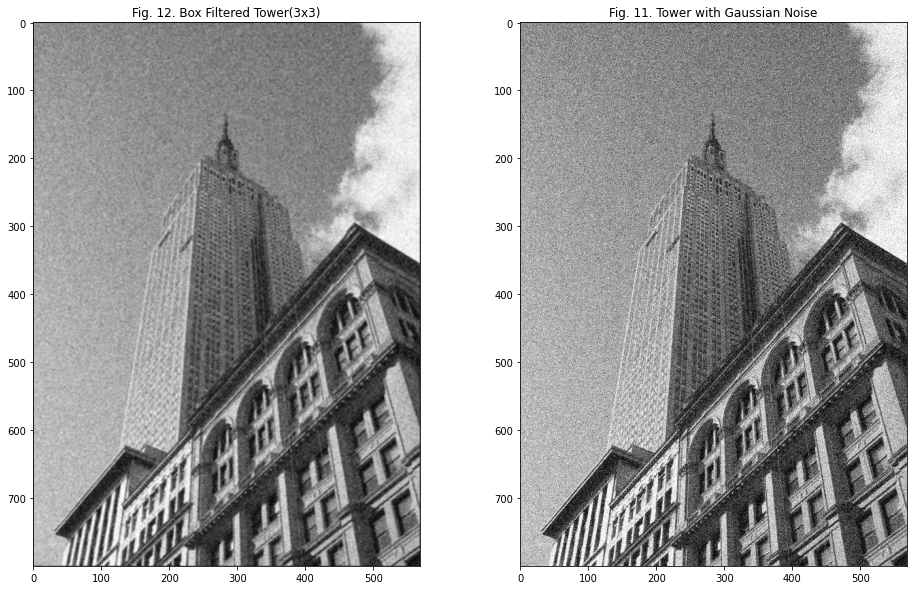

In [ ]:
#plot side by side
fig, axs = plt.subplots(ncols = 2, figsize=(16,10))
axs[0].imshow(tower_box_filtered, cmap = 'gray')
axs[0].set_title('Fig. 12. Box Filtered Tower(3x3)')
axs[1].imshow(grey_2b, cmap = 'gray')
axs[1].set_title('Fig. 11. Tower with Gaussian Noise')


**Q2, Pt. 3:  Compare the Peak-Signal-to-Noise-Ratio (PSNR) of both of the denoised images to that of the clean image and state which method gives the superior result.**


For some reason I get a different PSNR depending on which library's function, but both functions suggest that Gaussian filtering gives a slightly better result (72.96 compared to 72.67). Intuitively this makes sense as the image had Gaussian noise added to it.

In [ ]:
print("PSNR with Gaussian Filtering:", cv2.PSNR(grey_2a, tower_gauss_filtered))
print("PSNR with Box Filtering:", cv2.PSNR(grey_2a, tower_box_filtered))

PSNR with Gaussian Filtering: 72.98521738515146
PSNR with Box Filtering: 72.67230421682918


In [ ]:
#for some reason when I use skimage I get different values
from skimage.metrics import peak_signal_noise_ratio
print("PSNR with Gaussian Filtering:", peak_signal_noise_ratio(grey_2a, tower_gauss_filtered))
print("PSNR with Box Filtering:", peak_signal_noise_ratio(grey_2a, tower_box_filtered))

PSNR with Gaussian Filtering: 24.85441377600857
PSNR with Box Filtering: 24.541500607663775


**Q2, Pt. 4: Filter the noisy image using the same Gaussian filter as used in the previous question. Display the filtered image along with the original image.**

In [ ]:
salt_pepper_gauss_filtered = convolution_2d(grey_2c, gaussian_kernel_3x3)

Text(0.5, 1.0, 'Fig. 13. Tower with Salt and Pepper Noise')

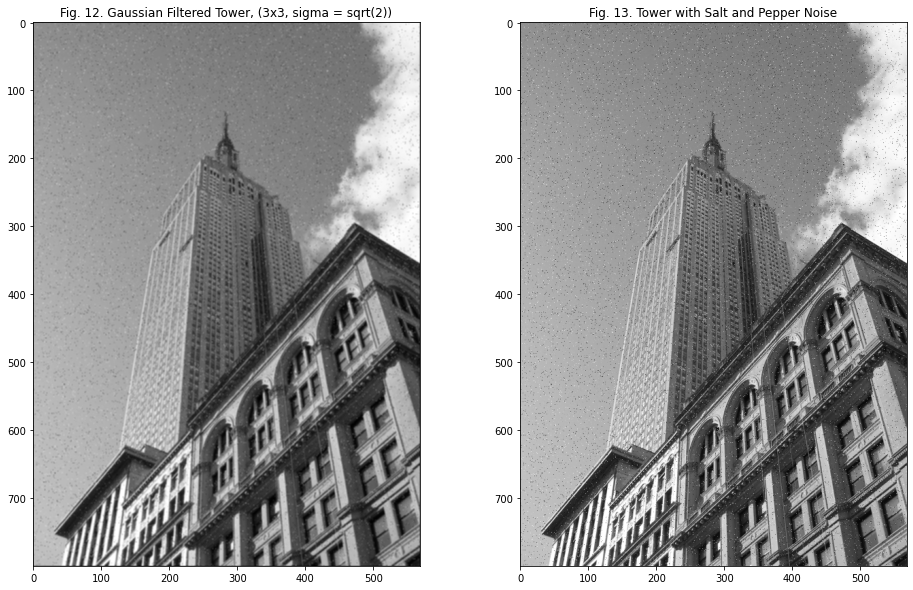

In [ ]:
#plot side by side
fig, axs = plt.subplots(ncols = 2, figsize=(16,10))
axs[0].imshow(salt_pepper_gauss_filtered, cmap = 'gray')
axs[0].set_title('Fig. 12. Gaussian Filtered Tower, (3x3, sigma = sqrt(2))')
axs[1].imshow(grey_2c, cmap = 'gray')
axs[1].set_title('Fig. 13. Tower with Salt and Pepper Noise')

**Q2, Pt. 5: Filter the noisy image using a median filter of the same size. Display the filtered image along with the original image**

In [ ]:
#implement median filter method:
def median_filter(image, kernel_size):

  pad_size = np.floor(3/2).astype("uint8")
  pad_image = np.pad(image, pad_width = int(pad_size), mode = 'constant', constant_values=0)

  h, w = pad_image.shape
  #init. output
  output = np.zeros_like(image)

  #loop through, use broadcast for elementwise multiplication.
  for i in range(0, h- 2 * pad_size):
    for j in range(0, w - 2 * pad_size):
      output[i,j] = np.median(pad_image[i : i + kernel_size, j : j + kernel_size])
  return output

In [ ]:
tower_median_filtered = median_filter(grey_2c, 3)

Text(0.5, 1.0, 'Fig. 13. Tower with Salt and Pepper Noise')

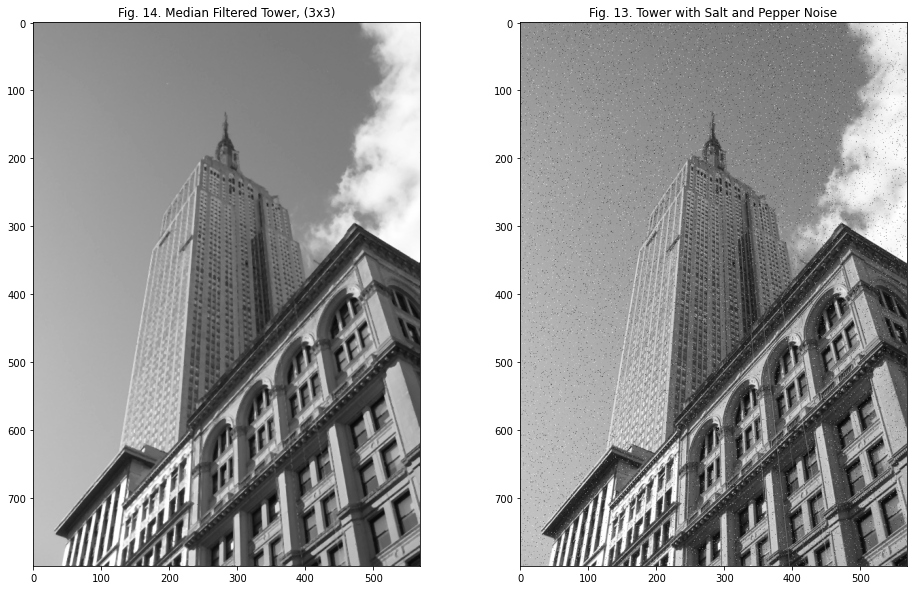

In [ ]:
#plot side by side
fig, axs = plt.subplots(ncols = 2, figsize=(16,10))
axs[0].imshow(tower_median_filtered, cmap = 'gray')
axs[0].set_title('Fig. 14. Median Filtered Tower, (3x3)')
axs[1].imshow(grey_2c, cmap = 'gray')
axs[1].set_title('Fig. 13. Tower with Salt and Pepper Noise')

**Q2, Pt. 6: Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result.**

For the salt and pepper noise image, median filtering gives a better PSNR result: 76.87 compared to 74.47 with gaussian filtering. Visually, the salt and pepper is not noticeable in the sky with median filtering; from lectures median filtering is expected to perform better.


In [ ]:
print("PSNR with Gaussian Filtering:", cv2.PSNR(grey_2a, salt_pepper_gauss_filtered))
print("PSNR with Median Filtering:", cv2.PSNR(grey_2a, tower_median_filtered))

PSNR with Gaussian Filtering: 74.47115152710188
PSNR with Median Filtering: 76.87236493115198


In [ ]:
print("PSNR with Gaussian Filtering:", peak_signal_noise_ratio(grey_2a, salt_pepper_gauss_filtered))
print("PSNR with Box Filtering:", peak_signal_noise_ratio(grey_2a, tower_median_filtered))

PSNR with Gaussian Filtering: 26.340347919331567
PSNR with Box Filtering: 28.74156132077095


# **Question 3: Sobel Edge Detection**
**Q3, Pt. 1: Apply three different versions of the Sobel edge detector with kernel sizes of 3×3, 5×5 and 7×7 to the image. Threshold the filtered image to detect edges. Use two values of thresholds: 10% and 20% of the maximum pixel value (magnitude) of the filtered image. Display the phase (gradient orientation), magnitude, and thresholded images for the different kernel sizes and different thresholds.**

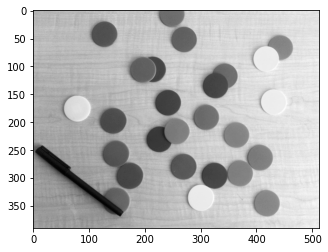

In [ ]:
circles = cv2.imread(path + "Circles.png", cv2.IMREAD_GRAYSCALE)
circles_gauss_noise = cv2.imread(path + "Circles_gauss.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(circles, cmap = 'gray')

In [ ]:
#A lot of plots need to be made so define a function:

def sobel(image, kernel_size):
  n = x #for figure numbering
  input = copy.copy(image) #points to the same as the input
  fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20, 10))
  I_x = cv2.Sobel(input, cv2.CV_64F, 1, 0, ksize = kernel_size)
  I_y = cv2.Sobel(input, cv2.CV_64F, 0, 1, ksize = kernel_size)
  I_m = cv2.magnitude(I_x, I_y)
  #thresholding:
  I_m_10 = copy.copy(I_m)
  I_m_20 = copy.copy(I_m)
  I_m_10[I_m_10 > (np.amax(I_m) * 10 / 100)] = 255
  I_m_20[I_m_20 > (np.amax(I_m) * 20 / 100)] = 255
  I_p = cv2.phase(I_x, I_y)
  
  axs[0, 0].imshow(I_x, cmap = "gray")
  tmp = ('Fig. {}. I_x (Kernel size = {}x{})').format(n, kernel_size, kernel_size)
  axs[0, 0].set_title(tmp)
  n += 1

  axs[0, 1].imshow(I_y, cmap = "gray")
  tmp = ('Fig. {}. I_y (Kernel size = {}x{})').format(n, kernel_size, kernel_size)
  axs[0, 1].set_title(tmp)
  n += 1

  axs[0, 2].imshow(I_p, cmap = "gray")
  tmp = ('Fig. {}. I_p (Kernel size = {}x{})').format(n, kernel_size, kernel_size)
  axs[0, 2].set_title(tmp)
  n += 1

  axs[1, 0].imshow(I_m, cmap = "gray")
  tmp = ('Fig. {}. I_m (Kernel size = {}x{})').format(n, kernel_size, kernel_size)
  axs[1, 0].set_title(tmp)
  n += 1

  axs[1, 1].imshow(I_m_10, cmap = "gray")
  tmp = ('Fig. {}. I_m (Threshold = 10%) (Kernel size = {}x{})').format(n, kernel_size, kernel_size)
  axs[1, 1].set_title(tmp)
  n += 1

  axs[1, 2].imshow(I_m_20, cmap = "gray")
  tmp = ('Fig. {}. I_x (Threshold = 20%) (Kernel size = {}x{})').format(n, kernel_size, kernel_size)
  axs[1, 2].set_title(tmp)
  n += 1

  return n



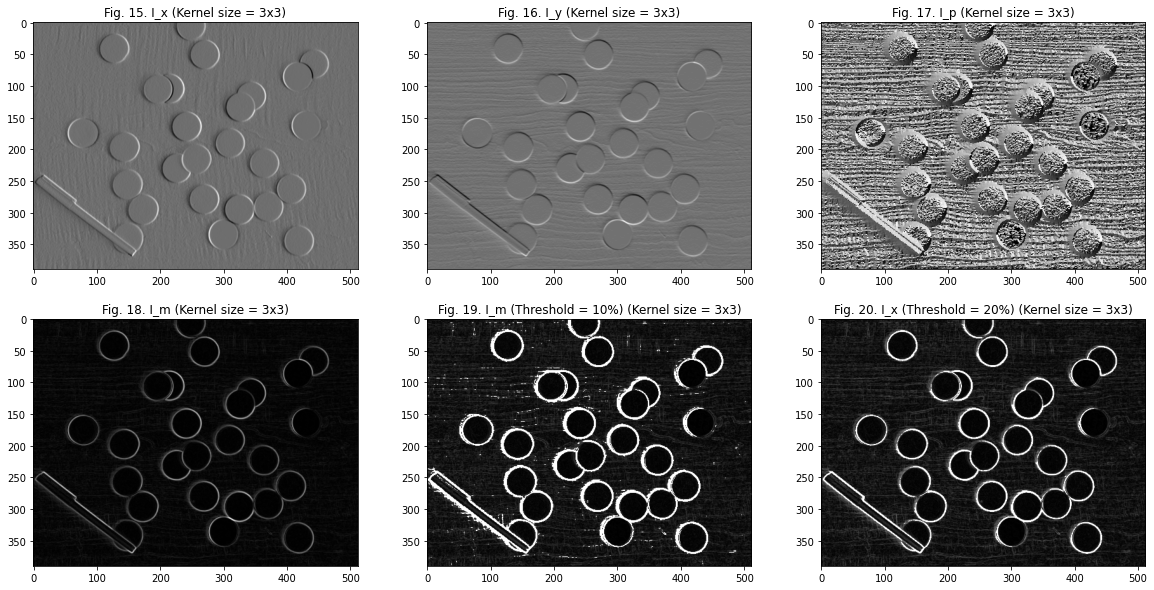

In [ ]:
filter_sizes = [3, 5, 7]
x = 15
x = sobel(circles, filter_sizes[0])
#For 3x3 Filter:

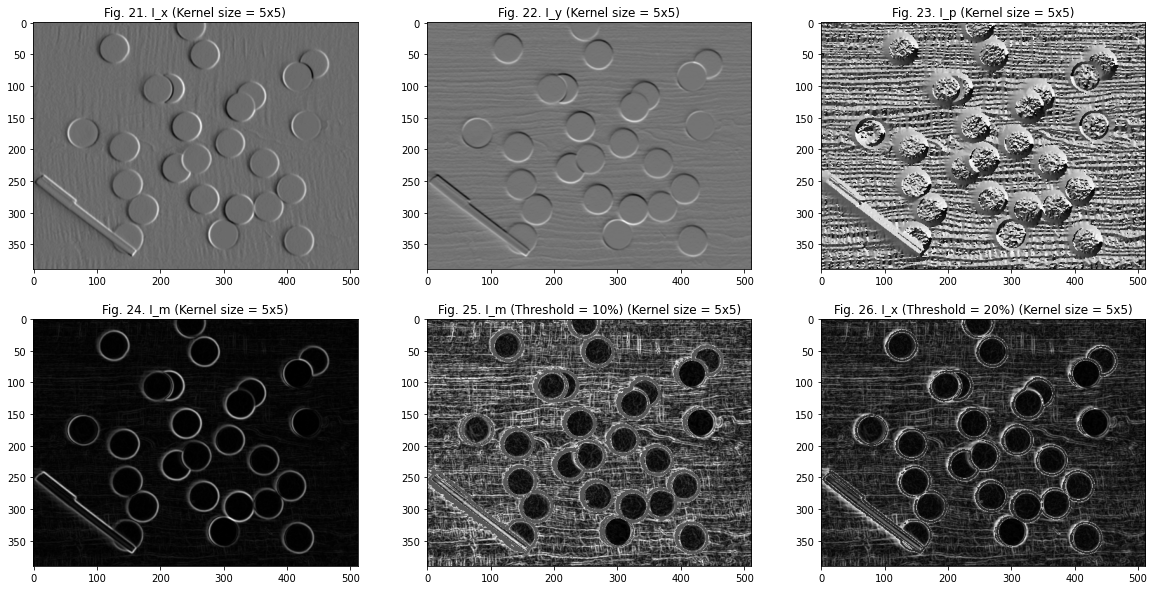

In [ ]:
#For 5x5 Filter:
x = sobel(circles, filter_sizes[1])

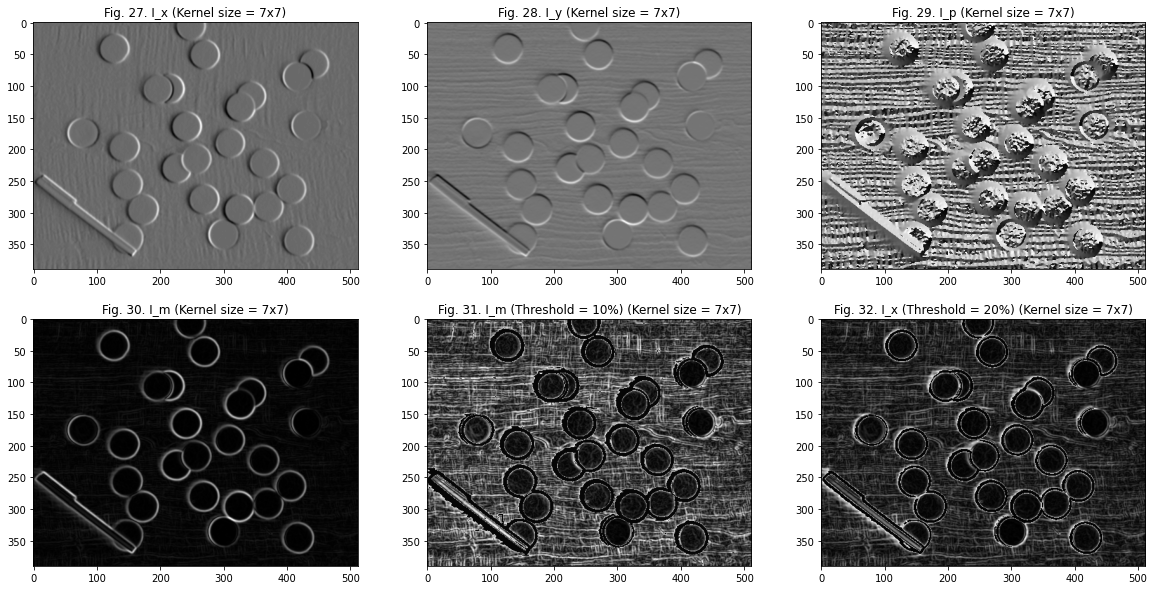

In [ ]:
#For 7x7 filter:
x = sobel(circles, filter_sizes[2])

**Comment on the effect of filter size on the output.**



*   For the x and y components of the gradient (Figs. 15-16, 21-22, 27-28), increasing the filter size makes the edges more pronounced, however, even at the 3x3 size, the edges are easily identifiable.
*   For the raw magnitude without thresholding (Figs. 18, 24 & 30), increasing the filter size makes the edges more pronounced as well (since more pixels are being convolved)
*   For the phase (Figs. 17, 23 & 29), increasing the filter size loses information as it makes the image less detailed or sharp
*   For the thresholded magnitude (Figs. 19-20, 25-26, 31-32), increasing the filter size increases noise. This is especially noticeable with a 10% thresholding level.



**Q3, Pt 2: Apply a Sobel edge detector with a kernel size of 3 × 3. Threshold the filtered image to detect edges. Use two values of thresholds: 10% and 20% of the maximum pixel value in magnitude of the filtered image. Display phase (gradient orientation), magnitude, and thresholded images for different thresholds.**

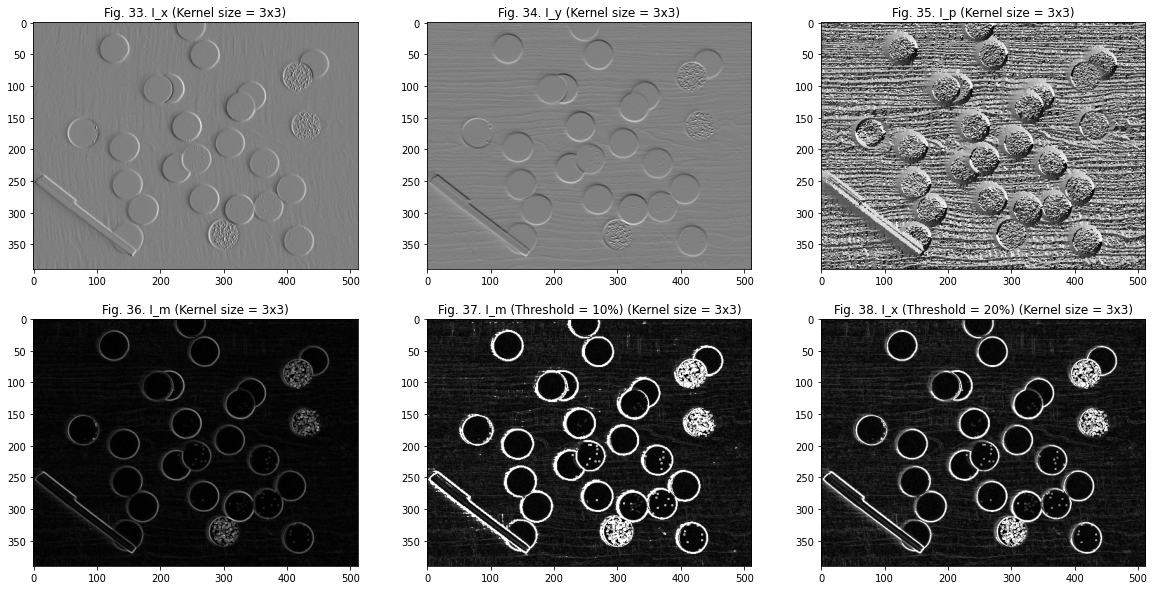

In [ ]:
x = sobel(circles_gauss_noise, 3)

**Denoise the image with a 3 × 3 box filter and then apply the same Sobel edge detector, with the same values of the thresholds, from the previous question. Display original and filtered image side by side. Display phase (gradient orientation), magnitude, and thresholded images for different thresholds**

Text(0.5, 1.0, 'Fig. 40. Circles with Gaussian Noise')

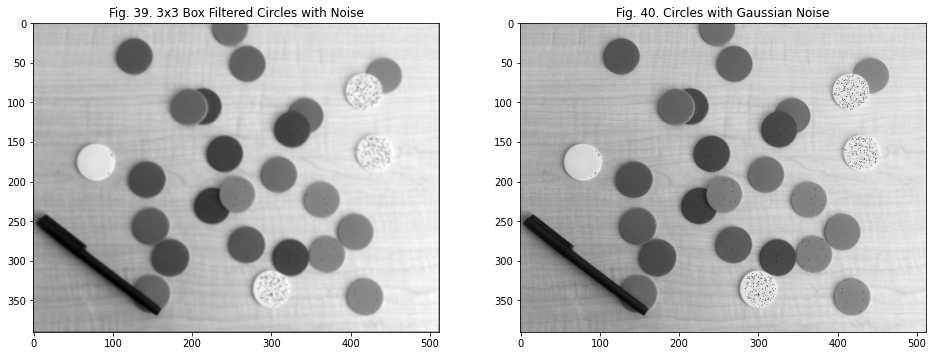

In [ ]:
denoised_circles = convolution_2d(circles_gauss_noise, box_3x3)
#plot side by side
fig, axs = plt.subplots(ncols = 2, figsize=(16,10))
axs[0].imshow(denoised_circles, cmap = 'gray')
axs[0].set_title(('Fig. {}. 3x3 Box Filtered Circles with Noise').format(x))
x += 1
axs[1].imshow(circles_gauss_noise, cmap = 'gray')
axs[1].set_title(('Fig. {}. Circles with Gaussian Noise').format(x))

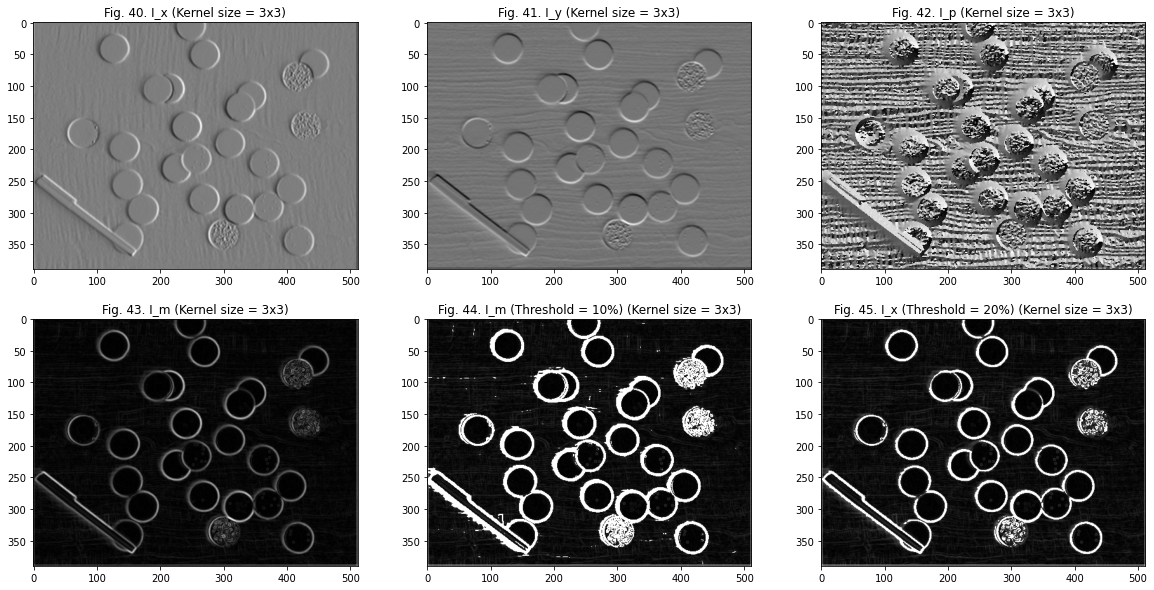

In [ ]:
x = sobel(denoised_circles, 3)

**Comment on the effectiveness of using denoising prior to edge detection**

Denoising prior to edge detection is effective at removing noise which may be clearly not an edge to a human eye but not necessarily to a computer. The edge detection results before denoising (Figs. 37-38) has far more noise in the form of white particles than the results after denoising (Figs. 44, 45). Fig. 45 still has a lot of noise in three circles, but nonetheless has a lot fewer white pixels than Fig. 38. Interestingly, the pen in Fig. 44 has more white pixels than in Fig 37 despite denoising, likely due to the threshold labeling the pen's shadow.